## **GIS 강의 2주차**

---

### **1. Geopandas 패키지 설치**
* 1-1) pip 로 Geopandas 설치하기
* 1-2) import library
### **2. 파일 불러오기**
* 2-1) shp 파일 불러오기 
* 2-2) csv 파일 불러오기 

### **3. 공간 데이터 핸들링**
* 3-1) 데이터 핸들링 
* 3-2) csv 파일의 x,y 컬럼을 공간 데이터(GeoDataframe) 로 변환 
* 3-3) 좌표계 부여, 변환하기 

### **4. Geopandas로 공간 속성 다루기**
* 4-1) 면적 (area) 
* 4-2) 길이
* 4-3) 도형의 무게중심
* 4-4) boundary 확인 
* 4-5) 공간의 유효성 확인 
* 4-6) 유효한 도형으로 만들기 

### **5. shapley 패키지 사용하여 shape 만들기**
* 5-1) 점(Point)
* 5-2) 선(LineString) 
* 5-3) 도형(Polygon) 

### **6. 공간데이터 활용하기**
* 6-1) 버퍼(buffer)
* 6-2) 도형을 감싸는 사각형 그리기(envelope) 
* 6-3) 도형 융해(dissolve)
* 6-4) 도형끼리 겹치는 부분 처리하기(overlay)

### **7. 공간 데이터 결합**
* 7-1) 여러 공간 결합 방법들 
* 7-2) 실제 데이터 응용하기

### **8. 저장하기**
* 8-1) shp 파일로 저장하기 

### **9. Reference**
* 9-1) ref 

차주 목표 : folium 패키지를 이용한 지도 시각화, plotly 를 통한 interactive 한 시각화, 공간통계 분석방법 

----


### **1. Geopandas 패키지 설치**
#### 1-1) pip 로 Geopandas 설치하기 <br>
  pip install 로 geopandas 를 설치하기 위해서는 [GDAl,pyproj,Fiona,Shapely]와 같은 패키지를 먼저 설치 후 <br>
  geopandas 를 설치해야 geopandas 패키지를 사용할 수 있어 패키지의 Dependency 가 매우 높아 설치 시 많은 어려움이 따르고 있다. <br>
  
  이를 해결하기 위해 conda 에서 기본 패키지 다운로드 채널을 conda-forge 로 기본 채널 변경 후 <br>
**conda install geopandas** 로 설치하는 것을 적극 권장한다. (회사 내부 anaconda 유료 이슈도 참고하길 바란다)

  <img width="879" alt="스크린샷 2022-09-22 오후 5 33 21" src="https://user-images.githubusercontent.com/83544197/191699051-ceab12b4-461f-47c0-a755-3a25e5c07c38.png">

<br>

---

#### 1-2) import library <br>

In [1]:
import os 
import sys 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd 
import folium
from shapely.geometry import Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon



### **2. 파일 불러오기**
#### 2-1) shp 파일 불러오기 <br>

* 해당 [링크](http://www.gisdeveloper.co.kr/?p=2332) 에서 시도, 시군구, 행정동의 최신 shp 파일을 다운로드 
* geopandas 설치후 아래와 같이 데이터를 불러와 준다.
<br>


In [3]:
file_path = '/Applications/anaconda3/envs/gis_env/git/shape/data'
os.listdir(file_path)

['starbucks.csv',
 'seoul_starbucks.csv',
 'korea_sig_shp',
 '.DS_Store',
 'korea_adm_shp',
 'korea_sido_shp']

In [4]:
# 시도 
korea_sido_shp = gpd.read_file(
	file_path + '/korea_sido_shp/ctp_rvn.shp',
	encoding='EUC-KR'
)

# 시군구 
korea_sig_shp = gpd.read_file(
	file_path + '/korea_sig_shp/sig.shp',
	encoding='EUC-KR'
)

# 행정동 
korea_adm_shp = gpd.read_file(
	file_path + '/korea_adm_shp/emd.shp',
	encoding='EUC-KR'
)


---
#### 2-2) csv 파일 불러오기 <br>
* 해당 [링크](https://essim92.tistory.com/25) 에서 전국 스타벅스 가맹점 위치 데이터 다운로드 

In [5]:
korea_st_buck_data = pd.read_csv(
	file_path + '/starbucks.csv',
	encoding='EUC-KR'
)

korea_st_buck_data.head()

,지점명,주소,위도,경도
0,구로호텔,"서울특별시 구로구 디지털로32길 72, 구로호텔 1층 (구로동)",37.483129,126.898859
1,구로디지털타워,서울특별시 구로구 디지털로32길 30 (구로동),37.483432,126.896480
2,구로디지털로,"서울특별시 구로구 디지털로33길 11, 에이스테크노8차 1층 (구로동)",37.485911,126.895587
3,구로에이스,"서울특별시 구로구 디지털로 285, 에이스트윈타워1차 103호 (구로동)",37.484483,126.894496
4,구로하이엔드,"서울특별시 구로구 디지털로26길 5, 에이스하이엔드타워1차 103호 (구로동)",37.481618,126.893136


### **3. 공간 데이터 핸들링**


#### 3-1) 데이터 핸들링 <br>


* 컬럼명 소문자로 변경 

In [6]:
# 컬럼명 소문자로 변경 

korea_sido_shp.columns = map(str.lower, korea_sido_shp.columns)
korea_sig_shp.columns = map(str.lower, korea_sig_shp.columns)
korea_adm_shp.columns = map(str.lower, korea_adm_shp.columns)

korea_sido_shp.head()

,ctprvn_cd,ctp_eng_nm,ctp_kor_nm,geometry
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((1146778.390 1679623.999, 11469..."
2,27,Daegu,대구광역시,"POLYGON ((1087859.999 1760097.461, 1087859.951..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((897904.035 1961082.190, 897886..."
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


* 한글 컬럼명 변겅 (개인 편의)

In [7]:

# 시도 

korea_sido_shp.rename(
	columns = {
		'ctprvn_cd': 'sido_cd',
		'ctp_eng_nm': 'sido_eng_nm',
		'ctp_kor_nm': 'sido_kor_nm'
	},
	inplace=True
)


#행정동 

korea_adm_shp.rename(
	columns={
		'emd_cd': 'adm_cd',
		'emd_eng_nm': 'adm_eng_nm',
		'emd_kor_nm': 'adm_kor_nm'
	},
	inplace=True
)


#스타벅스 

korea_st_buck_data.rename(
	columns = {
		'지점명': 'spot',
		'주소': 'address',
		'위도': 'lat',
		'경도': 'long'
	},
	inplace=True
)


---
#### 3-2) csv 파일의 x,y 컬럼을 공간 데이터(GeoDataFrame)으로 변환 <br>

* 위도(latitude), 경도(longitude) 각 컬럼을 아래와 같이 Point 형태의 데이터 타입으로 변경 (퍄트 5에서 추가 설명)

In [8]:
korea_st_buck_data['geometry'] = korea_st_buck_data.apply(
	lambda dt: Point([dt['long'],dt['lat']]),
	axis=1
)

korea_st_buck_data.head()

/Applications/anaconda3/envs/gis_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,spot,address,lat,long,geometry
0,구로호텔,"서울특별시 구로구 디지털로32길 72, 구로호텔 1층 (구로동)",37.483129,126.898859,POINT (126.89885909999998 37.4831293)
1,구로디지털타워,서울특별시 구로구 디지털로32길 30 (구로동),37.483432,126.896480,POINT (126.89648 37.483432)
2,구로디지털로,"서울특별시 구로구 디지털로33길 11, 에이스테크노8차 1층 (구로동)",37.485911,126.895587,POINT (126.895587 37.485911)
3,구로에이스,"서울특별시 구로구 디지털로 285, 에이스트윈타워1차 103호 (구로동)",37.484483,126.894496,POINT (126.8944957 37.48448329)
4,구로하이엔드,"서울특별시 구로구 디지털로26길 5, 에이스하이엔드타워1차 103호 (구로동)",37.481618,126.893136,POINT (126.893136 37.481618)


* GeoDataFrame 으로 변경시 'geometry' 파라미터에 공간 정보를 input 해줄 것 

In [9]:
korea_st_buck_gdf = gpd.GeoDataFrame(
	korea_st_buck_data,
	geometry = 'geometry'
)

korea_st_buck_gdf.drop(
	columns=['lat','long'],
	inplace=True
)

korea_st_buck_gdf.head()
type(korea_st_buck_gdf)

geopandas.geodataframe.GeoDataFrame

---
#### 3-3) 좌표계 부여, 변환하기 <br>

* 스타벅스 지점 데이터의 경우 초기 EPGS 값이 부여 되어 있지 않으므로 아래와 같이 EPGS 좌표계 부여

In [10]:
# 좌표계 부여
korea_st_buck_gdf.crs = {'init': 'epsg:4326'}

# 좌표계 확인
korea_st_buck_gdf.crs

/Applications/anaconda3/envs/gis_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

* 이제 스타벅스 지점 데이터와 shp 파일의 좌표계를 변경하여 같은 좌표계로 맞춰주자

In [11]:
korea_sido_shp = korea_sido_shp.to_crs({'init': 'epsg:5179'})
korea_sig_shp = korea_sig_shp.to_crs({'init': 'epsg:5179'})
korea_adm_shp = korea_adm_shp.to_crs({'init': 'epsg:5179'})
korea_st_buck_gdf = korea_st_buck_gdf.to_crs({'init': 'epsg:5179'})

/Applications/anaconda3/envs/gis_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Applications/anaconda3/envs/gis_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Applications/anaconda3/envs/gis_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' 

In [12]:
korea_sido_shp.head()

,sido_cd,sido_eng_nm,sido_kor_nm,geometry
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((1146778.390 1679623.999, 11469..."
2,27,Daegu,대구광역시,"POLYGON ((1087859.999 1760097.461, 1087859.951..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((897904.035 1961082.190, 897886..."
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


---
### **4. Geopandas로 공간 속성 다루기**


---
#### 4-1) 면적 (area) <br>
* 참고 : 각 지역의 면적을 구하기 위해서는 좌표계를 미터 좌표계로 변환 후 구해줘야 함

In [13]:
korea_sido_shp.geometry.area 

0     6.052404e+08
1     7.720244e+08
2     8.806354e+08
3     1.063262e+09
4     4.980031e+08
5     5.391073e+08
6     1.054780e+09
7     4.648703e+08
8     1.018992e+10
9     1.662850e+10
10    7.408902e+09
11    8.225117e+09
12    8.066827e+09
13    1.228281e+10
14    1.901879e+10
15    1.051337e+10
16    1.845549e+09
dtype: float64

---
#### 4-2) 길이 <br>
* 테두리의 길이 반환

In [14]:
korea_sido_shp.geometry.length

0     1.890338e+05
1     4.578478e+05
2     2.152391e+05
3     1.129739e+06
4     1.408953e+05
5     1.580056e+05
6     2.688995e+05
7     1.494989e+05
8     1.900657e+06
9     1.577561e+06
10    7.957023e+05
11    1.591102e+06
12    1.104374e+06
13    6.581468e+06
14    1.324848e+06
15    2.749527e+06
16    4.558080e+05
dtype: float64

---
#### 4-3) 도형의 무게중심 <br>


In [15]:
korea_sido_shp.geometry.centroid


0      POINT (955111.582 1950405.929)
1     POINT (1142043.895 1690704.134)
2     POINT (1096206.977 1759775.142)
3      POINT (900984.391 1954430.389)
4      POINT (939471.991 1684701.061)
5      POINT (990489.402 1815819.899)
6     POINT (1157493.116 1730076.741)
7      POINT (978414.327 1840348.554)
8      POINT (971806.006 1948241.098)
9     POINT (1070808.485 1969047.189)
10    POINT (1029502.370 1860031.839)
11     POINT (941837.440 1836959.867)
12     POINT (967659.058 1746664.672)
13     POINT (945193.457 1653618.827)
14    POINT (1112027.955 1817407.176)
15    POINT (1069220.402 1703447.561)
16     POINT (911983.820 1488782.494)
dtype: geometry

---
#### 4-4) boundary 확인 <br>
* 각 도형의 경계선 추출 

In [16]:
## seoul 지역 추출 (시도,군구,행정동)

sido_cond = (korea_sido_shp.sido_cd == '11')
sig_cond = (korea_sig_shp.sig_cd.str[0:2] == '11')
adm_cond = (korea_adm_shp.adm_cd.str[0:2] == '11')
adr_cond = (korea_st_buck_data.address.str[0:2] == '서울')

seoul_sido_shp = korea_sido_shp[sido_cond] 
seoul_sig_shp = korea_sig_shp[sig_cond]
seoul_adm_shp = korea_adm_shp[adm_cond]
seoul_st_buck_gdf = korea_st_buck_gdf[adr_cond]

Text(0.5, 1.0, 'admdong boundary')

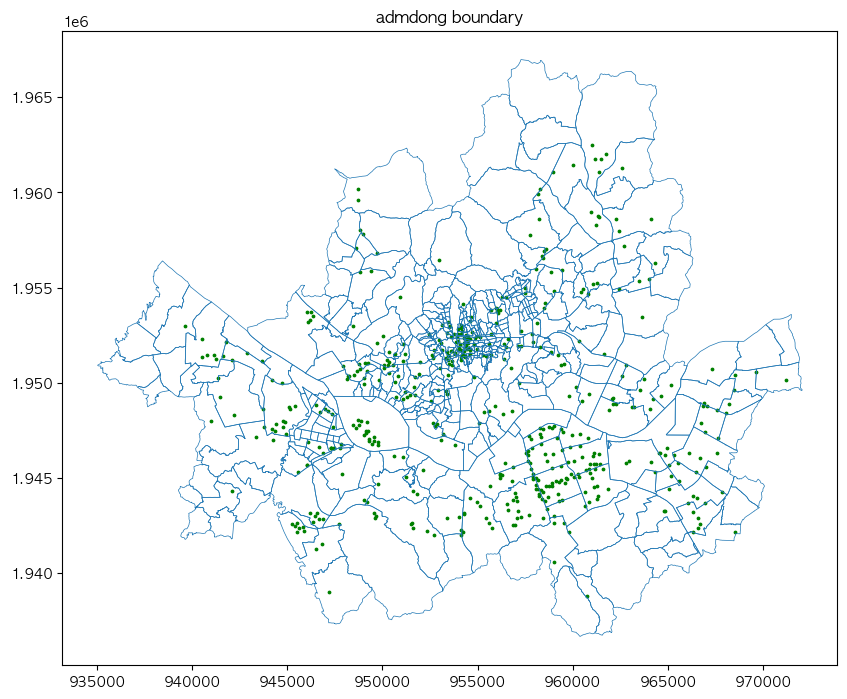

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) # 4개의 ax를 가진 하나의 figure 생성

seoul_adm_shp.geometry.boundary.plot(ax = ax,linewidth=0.5)
seoul_st_buck_gdf.plot(ax=ax,color='green',markersize=3)
plt.title('admdong boundary')

---
#### 4-5) 공간의 유효성 확인 <br>
* 서울 행정동 공간 유효성을 확인 해서 유효한(True) 것과 그렇지 않은것의 개수를 확인 

In [18]:
print(seoul_adm_shp.geometry.is_valid)
print('-'*50)
print('전체 도형의 수: ',len(seoul_adm_shp.geometry.is_valid))
print('유효한 도형의 수: ', sum(seoul_adm_shp.geometry.is_valid))

0      True
1      True
2      True
3      True
4      True
       ... 
462    True
463    True
464    True
465    True
466    True
Length: 467, dtype: bool
--------------------------------------------------
전체 도형의 수:  467
유효한 도형의 수:  466


---
#### 4-6) 유효한 도형으로 만들기 <br>
* gis_lecture1.ipynb 에서 다루었듯 도형에 buffer 를 부여하여 유효한 도형으로 만들어 준다.

In [19]:

seoul_adm_shp['geometry'] = seoul_adm_shp.buffer(0.1)

print('전체 도형의 수: ',len(seoul_adm_shp.geometry.is_valid))
print('유효한 도형의 수: ', sum(seoul_adm_shp.geometry.is_valid))


전체 도형의 수:  467
유효한 도형의 수:  467


/Applications/anaconda3/envs/gis_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


---
### **5. shapely 패키지 사용하여 shape 만들기**

---
#### 5-1) 점(Point)

* 좌표평면에서 (1,1) 인 Point 데이터 만들기

<AxesSubplot: >

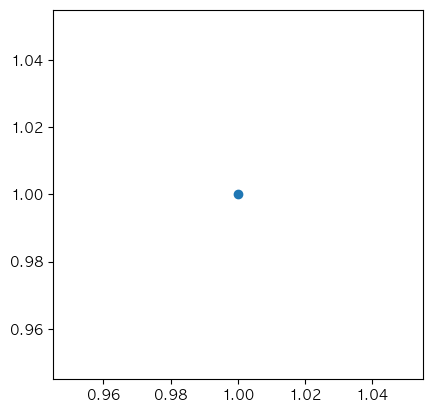

In [20]:
p1_pt = Point(
	[1,1],
)

p1_gdf = gpd.GeoDataFrame(
	{'geometry': p1_pt},
	index = [0]
)

p1_gdf.plot()

* Multi 함수 이용하여 한번에 여러점 찍기 (방법1)

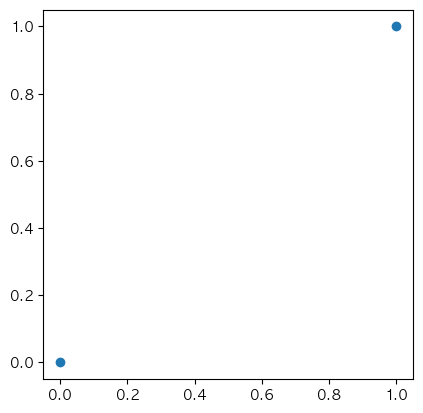

In [21]:

p2_mpt = MultiPoint(
	[
		(0,0),
		(1,1)	
	]
)


p2_gdf = gpd.GeoDataFrame(
	{
		'geometry': p2_mpt
	},
	index = [0,1]
)

p2_gdf.plot()
plt.show()

* Multi 함수 사용 안하고 한번에 여러점 찍기, 개인적으로 선호 (방법2)

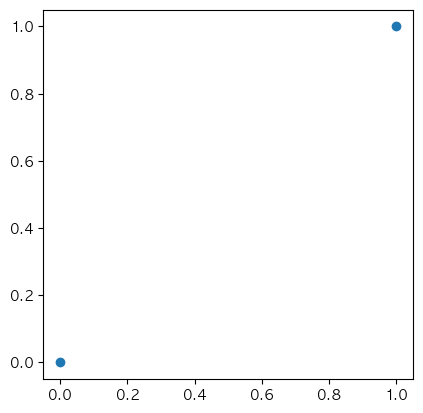

In [22]:

p3_sr = gpd.GeoSeries(
	[
		Point([0,0]),
		Point([1,1])
	]
)


p3_gdf = gpd.GeoDataFrame(
	{
		'geometry': p3_sr
	}
)

p3_gdf.plot()
plt.show()

---
#### 5-2) 선(LineString) 
* 좌표평면에 (0,0) 과 (10,10)을 이어주는 선 그리기

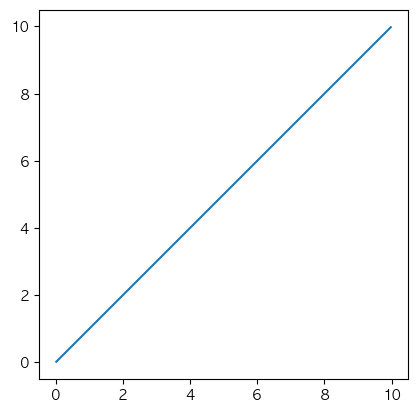

In [23]:

l1_sr = gpd.GeoSeries(
	[
		LineString([(0,0),(10,10)])	
	]
)

l1_sr.plot()
plt.show()


* 여러 선 한번에 그리기

<AxesSubplot: >

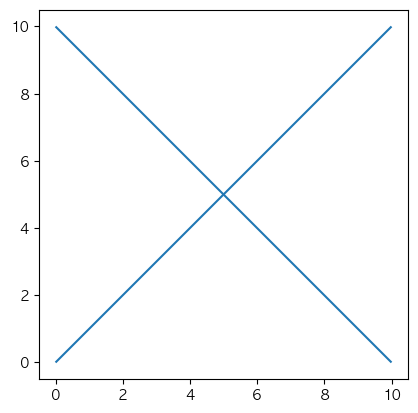

In [24]:

l2_sr = gpd.GeoSeries(
	[
		LineString([(0,0),(10,10)]),
		LineString([(0,10),(10,0)])		
	]
)

l2_gdf = gpd.GeoDataFrame(
	{
		'geometry': l2_sr
	}
)

l2_gdf.plot()

---
#### 5-3) 도형(Polygon) 
* 정사각형 그리기 (각 꼭지점의 순서를 유의하여 그리기)

<AxesSubplot: >

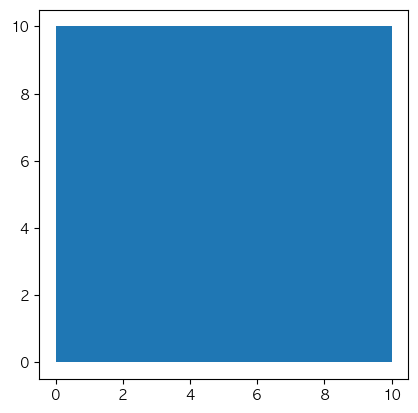

In [25]:

poly1_sqr_sr = gpd.GeoSeries(
	[
		Polygon([(0,0),(10,0),(10,10),(0,10)])
	] 
)


poly1_sqr_gdf = gpd.GeoDataFrame(
	{
		'geometry': poly1_sqr_sr	
	}
)


poly1_sqr_gdf.plot()

* 그림이 그려지는 좌표 순서를 바꿀 경우 같은 꼭지점을 갖지만 다른 모양의 Polygon이 그려짐

<AxesSubplot: >

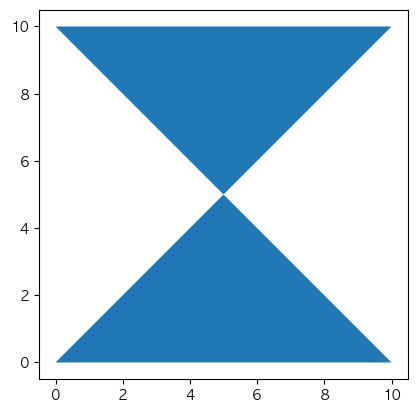

In [26]:

poly2_hglas_sr = gpd.GeoSeries(
	[
		Polygon([(0,0),(10,0),(0,10),(10,10)])
	]
)


poly2_gdf = gpd.GeoDataFrame(
	{
		'geometry': poly2_hglas_sr
	}
)

poly2_hglas_sr.plot()

---
### **6. 공간데이터 활용하기**

---
#### 6-1) 버퍼 (buffer)
* 중심점이 (250,250)인 점을 찍고 250미터의 buffer 주기 


In [27]:

pt_circle_gsr = gpd.GeoSeries(
	[
		Point([250,250])
	]
)

pt_circle_gdf = gpd.GeoDataFrame(
	{
		'geometry': pt_circle_gsr
	}
)


<AxesSubplot: >

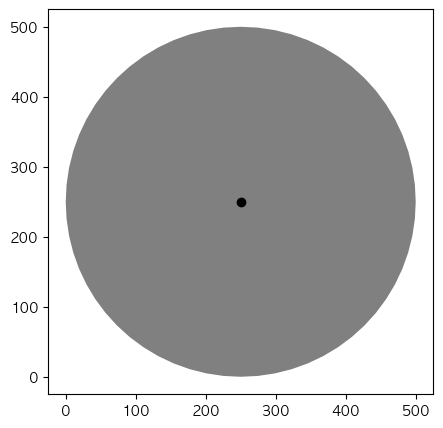

In [28]:

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) # 4개의 ax를 가진 하나의 figure 생성

pt_circle_gsr.buffer(250).plot(ax=ax,color='gray')
pt_circle_gsr.plot(ax=ax,color='black')

---
#### 6-2) 도형을 감싸는 사각형 그리기(envelope)
* 기존 (250,250)의 점에 (100,100) 과 (200,200)의 점 추가하기

In [29]:
add_two_point = gpd.GeoDataFrame(
	{
		'geometry': [Point(100,100),Point(200,200)]
	}
)

pt_circle_add_pt_gdf = pd.concat(
	[
		pt_circle_gdf,
		add_two_point
	],
	ignore_index=True
)

<AxesSubplot: >

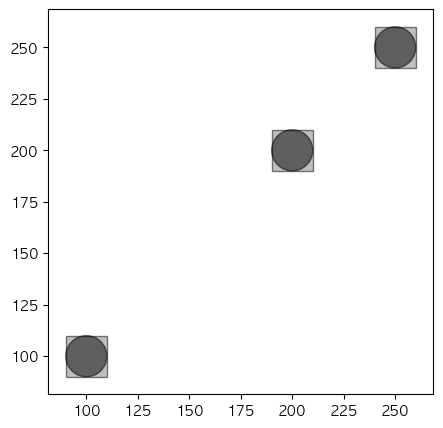

In [30]:

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) 

pt_circle_add_pt_gdf.buffer(10).envelope.plot(ax=ax,color='gray',alpha=0.5,edgecolor='black')
pt_circle_add_pt_gdf.buffer(10).plot(ax=ax,color='black',alpha=0.5,edgecolor='black')


---
#### 6-3) 도형 융해(dissolve)
* group 의 영역으로 Polygon 을 합쳐주는 방법으로 서울 행정동 shp파일을 시군구의 영역으로 디졸브 해보자

<img src = 'https://user-images.githubusercontent.com/83544197/188360152-b6e6fb79-3750-49cb-86c2-caf923e2acaf.png' width = '500' height = '250' > <br>


In [31]:
seoul_adm_shp['group'] = seoul_adm_shp.adm_cd.str[0:5] 

/Applications/anaconda3/envs/gis_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 1.0, '행정동 디졸브 후')

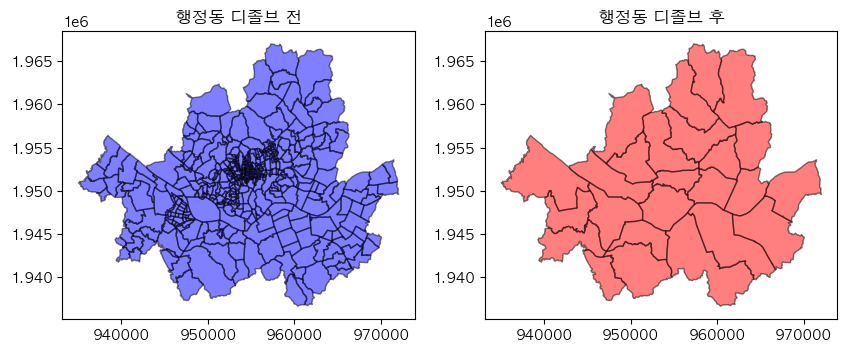

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10)) 

# 디졸브 전
seoul_adm_shp.plot(ax=ax[0],color='blue',alpha=0.5,edgecolor='black')
ax[0].set_title('행정동 디졸브 전')

#디졸브 후 
seoul_adm_shp.dissolve(by='group').plot(ax=ax[1],color='red',alpha=0.5,edgecolor='black')
ax[1].set_title('행정동 디졸브 후')


---
#### 6-4) 도형끼리 겹치는 부분 처리하기(overlay)

* 임의의 두개의 Polygon을 땅과 강으로 가정하여 생성

In [38]:

# 땅
poly_land_gdf = gpd.GeoDataFrame(
	{
		'geometry': [
			Polygon([(0,0),(2,0),(2,2),(0,2)]),
			Polygon([(3,3),(4,3),(4,4),(3,4)])
			
		]
	}
)

# 강 
poly_river_gdf = gpd.GeoDataFrame(
	{
		'geometry': [
			Polygon([(0,1),(1,0),(3,2),(2,3)])
		]
	}
)

<AxesSubplot: >

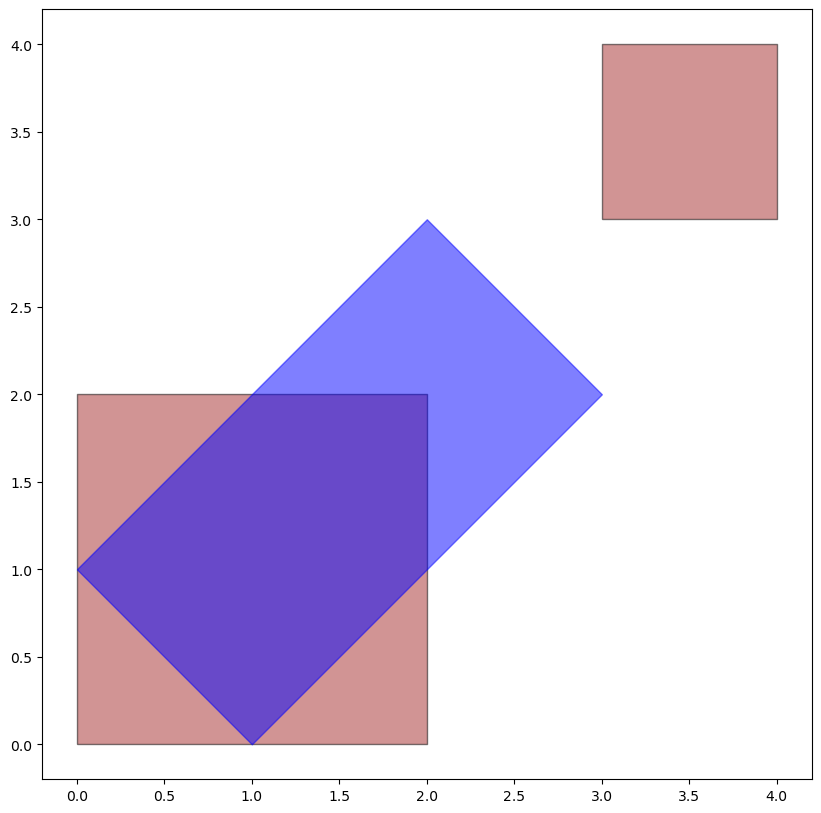

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 

poly_land_gdf.plot(ax=ax,color='brown',edgecolor='black',alpha=0.5)
poly_river_gdf.plot(ax=ax,color='blue',edgecolor='blue',alpha=0.5)


* 두 도형의 합집합 


<AxesSubplot: >

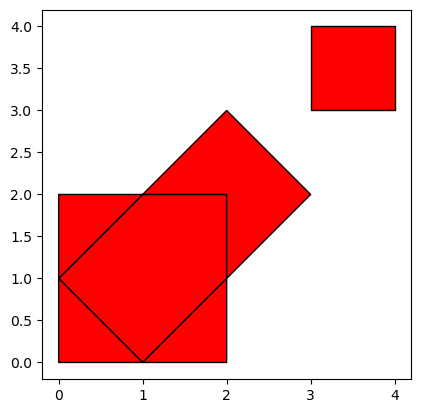

In [97]:
poly_union_gdf = gpd.overlay(
	poly_land_gdf,
	poly_river_gdf,
	how = 'union'
)
poly_union_gdf.plot(color='red',edgecolor='black')

* 두 도형의 교집합

<AxesSubplot: >

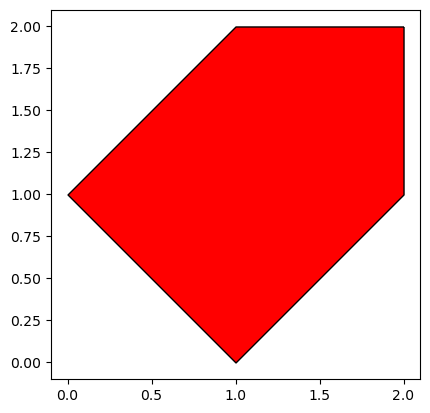

In [94]:

poly_intersect_gdf = gpd.overlay(
	poly_land_gdf,
	poly_river_gdf,
	how = 'intersection'
)

poly_intersect_gdf.plot(color='red',edgecolor='black')

* 두 도형의 여집합 

<AxesSubplot: >

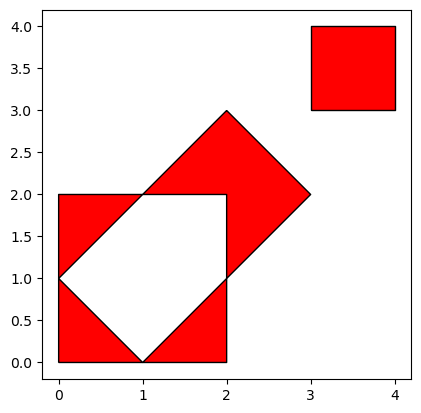

In [95]:

poly_sym_diff_gdf = gpd.overlay(
	poly_land_gdf,
	poly_river_gdf,
	how = 'symmetric_difference'
)

poly_sym_diff_gdf.plot(color='red',edgecolor='black')


* 두 도형의 차집합 

<AxesSubplot: >

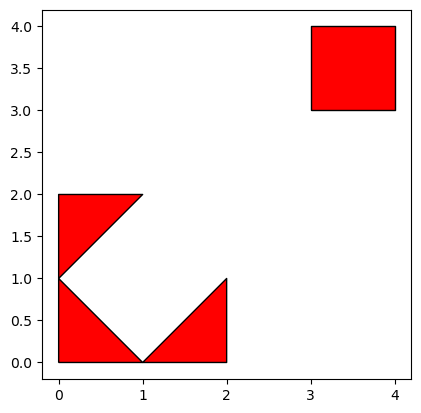

In [96]:
poly_diff_gdf = gpd.overlay(
	poly_land_gdf,
	poly_river_gdf,
	how = 'difference'
)

poly_diff_gdf.plot(color='red',edgecolor='black')

---
### **7. 공간 데이터 결합**



#### 7-1) 여러 공간 결합 방법들
* within : right 가 left안에 있는가? 


* contain :left 가 right 를 포함하는가? <br>
(within 과 contain은 같은 역할을 하나 어느 데이터를 기준으로 놓는지에 따라 구분하여 사용 할 것)

* intersects : 영역, 혹은 경계선이 겹쳐지는 부분이 있는가?

* 결합 방법은 기존 데이터 Join 방법인 [left,right,inner,full] 과 동일
---

In [34]:
# point 데이터 생성 

pt_spot_gdf = gpd.GeoDataFrame(
	{
		'geometry': MultiPoint(
			[
				(1,1),
				(3,1),
				(3,2),
				(2,2),
				(1,3),
				(3.5,3.5)
			]
		)
	}
)


* 강(파란색 영역), 땅(갈색 영역), 점(검은색) 을 아래와 같이 확인

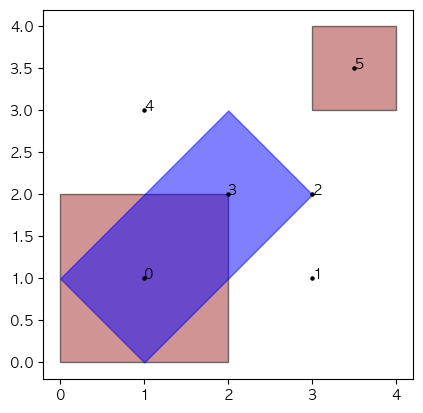

In [42]:
pt_spot_x = pt_spot_gdf.geometry.x
pt_spot_y = pt_spot_gdf.geometry.y

ax = poly_land_gdf.plot(color='brown',edgecolor='black',alpha=0.5)
poly_river_gdf.plot(ax=ax,color='blue',edgecolor='blue',alpha=0.5)
pt_spot_gdf.plot(ax=ax,color='black',markersize=5)

for idx, xy_coord in enumerate(zip(pt_spot_x,pt_spot_y)):
	plt.text(
		xy_coord[0],
		xy_coord[1],
		idx
	)

plt.show()

In [51]:

def plot_ord_sjoin(pt_gdf,poly_join_gdf,col=None):

	"""
	pt_gdf : point data 
	poly_join_gdf : joined geo data frame
	col : color string  
	"""

	spot_idx = pt_gdf.iloc[poly_join_gdf.index_right,:].index
	spot_x = pt_gdf.iloc[poly_join_gdf.index_right,:].geometry.x
	spot_y = pt_gdf.iloc[poly_join_gdf.index_right,:].geometry.y 

	ax = poly_join_gdf.plot(color=col,edgecolor='black',alpha=0.5)

	pt_gdf.iloc[poly_join_gdf.index_right,:].plot(ax=ax,color='black',markersize=5)

	for idx,x,y in zip(spot_idx,spot_x,spot_y):
		plt.text(
			x,
			y,
			idx
		)
	
	return plt.show()

* 땅(갈색) 영역중 점을 포함하는 영역에 대하여 공간 결합 결과

In [48]:
poly_land_cont_gdf = gpd.sjoin(
	poly_land_gdf,
	pt_spot_gdf,
	how = 'left',
	predicate = 'contains'
)


* 공간 결합결과 땅(갈색) 영역이 [0,5]번 점을 포함(contain)하는 것을 확인

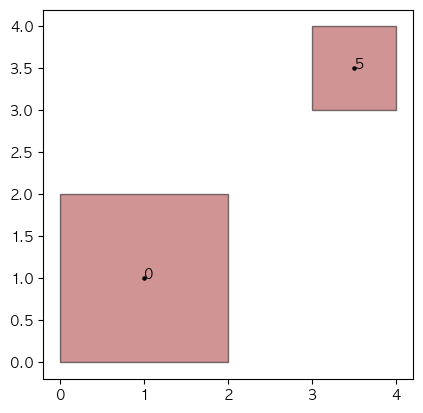

In [52]:
plot_ord_sjoin(
	pt_spot_gdf,
	poly_land_cont_gdf,
	col = 'brown'
)


* intersects 결과

In [53]:
poly_land_inter_gdf = gpd.sjoin(
	poly_land_gdf,
	pt_spot_gdf,
	how = 'left',
	predicate = 'intersects'
)


---
#### 7-2) 실제 데이터 응용하기


## **8. 저장하기**
#### 8-1) shp파일로 저장하기 <br>

<br>

---

## **9. Reference**
#### 9-1) ref <br>


[geopandas 유저 가이드](https://geopandas.org/en/stable/docs/user_guide.html)

[Shapely 사용법](https://programmerpsy.tistory.com/104)

[shp 파일 다운로드](http://www.gisdeveloper.co.kr/?p=2332)        
                                                                                                                                                                                                                                                                                       
<br>

---

* 다음은 낙동강 데이터를 이용한 실제 Geo data analysis 를 다뤄보도록 하겠다